In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-09-11 20:25:54--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-09-11 20:25:54 (32.6 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
!pip install -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 22.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = df.index.inferred_freq
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
def walkthrough(df, forecast_horizon, val_steps, **kwargs):
  Ntrain = len(df) - forecast_horizon - val_steps + 1
  errors = []
  for end_train in range(Ntrain, len(df) - forecast_horizon + 1):
    df_train = df.iloc[:end_train]
    df_test = df.iloc[end_train: end_train + forecast_horizon]
    hw = ExponentialSmoothing(df_train, **kwargs)
    hw_res = hw.fit()
    errors.append(mean_squared_error(hw_res.forecast(forecast_horizon), df_test))
  return np.mean(errors)

def grid_search(df, forecast_horizon, val_steps, params_grid):
  best_score = float('inf')
  best_model = None
  for args in itertools.product(*params_grid.values()):
    kwargs = dict(zip(params_grid.keys(), args))
    score = walkthrough(df, forecast_horizon, val_steps, **kwargs)
    if score < best_score:
      best_score = score
      print(f'Best score so far: {score:.4f}')
      best_model = kwargs
  return best_model, best_score

In [ ]:
import itertools
import sklearn.metrics

def walkthrough(df, step_size, n_steps, scoring, **kwargs):
  Ntrain = len(df) - step_size - n_steps + 1
  score = []
  for end_train in range(Ntrain, len(df) - step_size + 1):
    df_train = df.iloc[:end_train]
    df_test = df.iloc[end_train: end_train + step_size]
    hw = ExponentialSmoothing(df_train, **kwargs)
    hw_res = hw.fit()
    score.append(scoring(hw_res.forecast(step_size), df_test))
  return np.mean(score)

def grid_search(df, params_grid, step_size, n_steps,
                scoring=sklearn.metrics.r2_score, greater_is_better=True):
  score_sign = +1 if greater_is_better else -1
  best_score = float('-inf')
  best_model = None
  for args in itertools.product(*params_grid.values()):
    kwargs = dict(zip(params_grid.keys(), args))
    score = walkthrough(df, step_size, n_steps, scoring, **kwargs)
    if score_sign * (score - best_score) > 0:
      best_model, best_score = kwargs, score
      print(f'Best {scoring.__name__} so far: {best_score:.4f}')
  return best_model, best_score

In [ ]:
params_grid = {
  'initialization_method': ['legacy-heuristic', 'heuristic', 'estimated'],
  'trend': ['add', 'mul'],
  'damped_trend': [False, True],
  'seasonal': ['add', 'mul'],
  'seasonal_periods': [12],
  'use_boxcox': [False, True, 0]  # 0 = log
}

#best_model, best_score = grid_search(df['Passengers'], forecast_horizon=12, val_steps=10, params_grid=params_grid)
best_model, best_score = grid_search(df['Passengers'], params_grid, step_size=12, n_steps=10)
print(f'Best score: {best_score:.4f}')
for k,v in best_model.items():
  print(f'{k}:{v}')

Best r2_score so far: 0.8856
Best r2_score so far: 0.9392


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best r2_score so far: 0.9433


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best r2_score so far: 0.9456


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best score: 0.9456
initialization_method:legacy-heuristic
trend:mul
damped_trend:True
seasonal:mul
seasonal_periods:12
use_boxcox:False


Test RMSE = 17.36
Test MAE  = 11.73


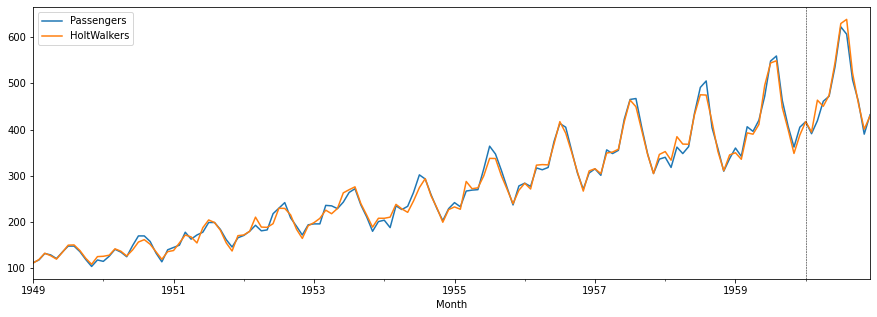

In [ ]:
# Fit with the best model
Ntest = 12
df_train = df.iloc[:-Ntest]['Passengers']
df_test = df.iloc[-Ntest:]['Passengers']
hw = ExponentialSmoothing(df_train, **best_model)
hw_res = hw.fit()
# Score
hw_forecast = hw_res.forecast(Ntest)
print(f'Test RMSE = {mean_squared_error(df_test, hw_forecast, squared=False):5.2f}')
print(f'Test MAE  = {mean_absolute_error(df_test, hw_forecast):5.2f}')
# Plot
df['HoltWalkers'] = pd.concat([hw_res.fittedvalues, hw_forecast])
df.plot(figsize=(15,5));
plt.axvline(x=df.index[-Ntest], color='black', ls='--', lw=.5);
plt.show()